In [1]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, precision_score, r2_score, mean_squared_error
# impot pipeline
from sklearn.pipeline import Pipeline
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
df = pd.read_csv(r"C:\Users\shashank\majorfinal.csv")

In [3]:
#Checking the dataset:

In [4]:
print(df.shape)

(920, 17)


In [5]:
df.head()

Unnamed: 0  id  age     sex    dataset               cp  trestbps   chol  \
0           0   1   63    Male  Cleveland   typical angina     145.0  233.0   
1           1   2   67    Male  Cleveland     asymptomatic     160.0  286.0   
2           2   3   67    Male  Cleveland     asymptomatic     120.0  229.0   
3           3   4   37    Male  Cleveland      non-anginal     130.0  250.0   
4           4   5   41  Female  Cleveland  atypical angina     130.0  204.0   

     fbs         restecg  thalch  exang  oldpeak        slope   ca  num  BMI  
0   True  lv hypertrophy   150.0  False      2.3  downsloping  0.0    0    2  
1  False  lv hypertrophy   108.0   True      1.5         flat  3.0    2   28  
2  False  lv hypertrophy   129.0   True      2.6         flat  2.0    1   23  
3  False          normal   187.0  False      3.5  downsloping  0.0    0   11  
4  False  lv hypertrophy   172.0  False      1.4    upsloping  0.0    0   13

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   id          920 non-null    int64  
 2   age         920 non-null    int64  
 3   sex         920 non-null    object 
 4   dataset     920 non-null    object 
 5   cp          920 non-null    object 
 6   trestbps    861 non-null    float64
 7   chol        890 non-null    float64
 8   fbs         830 non-null    object 
 9   restecg     918 non-null    object 
 10  thalch      865 non-null    float64
 11  exang       865 non-null    object 
 12  oldpeak     858 non-null    float64
 13  slope       611 non-null    object 
 14  ca          309 non-null    float64
 15  num         920 non-null    int64  
 16  BMI         920 non-null    int64  
dtypes: float64(5), int64(5), object(7)
memory usage: 122.3+ KB


In [7]:
print(df.isnull().sum().sort_values(ascending=False))

ca            611
slope         309
fbs            90
oldpeak        62
trestbps       59
thalch         55
exang          55
chol           30
restecg         2
num             0
Unnamed: 0      0
id              0
cp              0
dataset         0
sex             0
age             0
BMI             0
dtype: int64


In [8]:
#Performing EDA

Mean: 53.51086956521739
Median: 54.0
Mode: 54


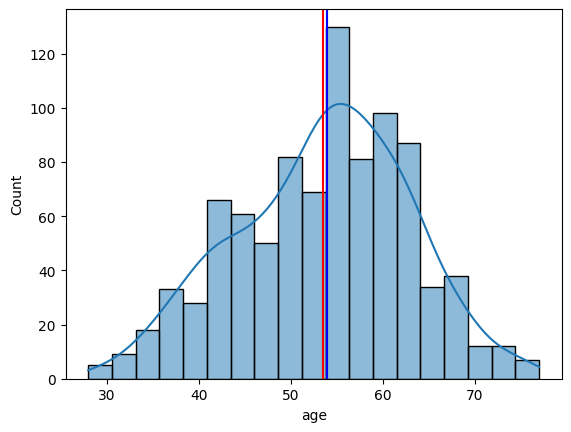

In [9]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [10]:
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [11]:
print(df['sex'].value_counts())

Male      726
Female    194
Name: sex, dtype: int64


In [12]:
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%


<Axes: ylabel='sex'>

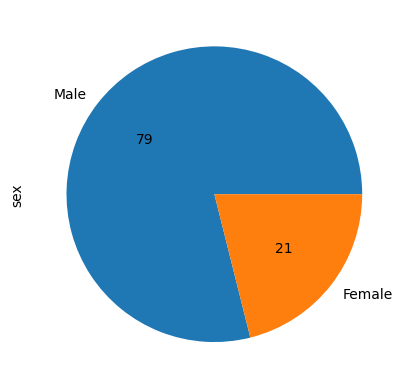

In [13]:
df['sex'].value_counts().plot(kind='pie',autopct='%2.f')

In [14]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [15]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [16]:
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64


<Axes: xlabel='dataset,num'>

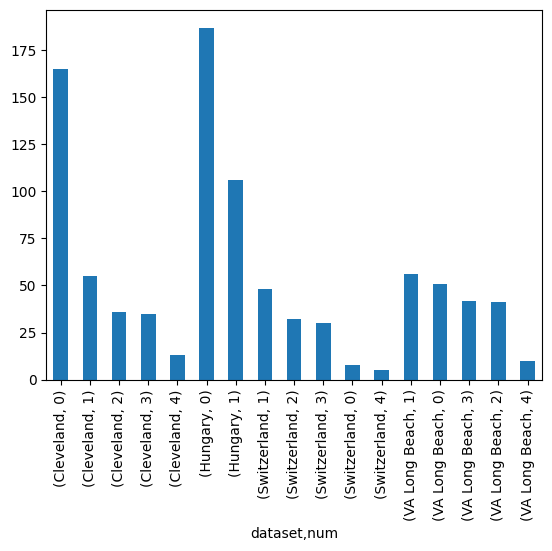

In [17]:
df.groupby('dataset')['num'].value_counts().plot(kind='bar')

In [18]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [19]:
print(sns.histplot(df['trestbps'], kde=True))

Axes(0.125,0.11;0.775x0.77)


In [20]:
# make a plot of trestbps column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='trestbps', color='dataset')
fig.show()

In [21]:
df.groupby(df['sex'])[['trestbps']].describe()

trestbps                                                         
          count        mean        std   min    25%    50%    75%    max
sex                                                                     
Female    192.0  132.093750  19.509202  94.0  120.0  130.0  140.0  200.0
Male      669.0  132.143498  18.951807   0.0  120.0  130.0  140.0  200.0

In [22]:
sns.histplot(df['chol'], kde=True)
plt.axvline(df['chol'].mean(), color='red')
plt.axvline(df['chol'].median(), color='green')
plt.axvline(df['chol'].mode()[0], color='blue')

In [23]:
df.groupby(df['sex'])[['chol']].describe()

chol                                                         
        count        mean         std  min    25%    50%    75%    max
sex                                                                   
Female  187.0  241.481283   86.291226  0.0  204.0  244.0  291.0  564.0
Male    703.0  187.864865  113.858400  0.0  156.5  220.0  263.0  603.0

In [24]:
df['fbs'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: fbs
Non-Null Count  Dtype 
--------------  ----- 
830 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [25]:
df['fbs'].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [26]:
df.groupby(df['fbs'])[['sex']].value_counts()

fbs    sex   
False  Male      528
       Female    164
True   Male      119
       Female     19
dtype: int64

In [27]:
df['restecg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: restecg
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [28]:
df['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [29]:
df.groupby(df['restecg'])[['sex']].value_counts()

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      432
                  Female    119
st-t abnormality  Male      151
                  Female     28
dtype: int64

In [30]:
df.groupby(df['restecg'])[['dataset']].value_counts()

restecg           dataset      
lv hypertrophy    Cleveland        149
                  VA Long Beach     27
                  Switzerland        7
                  Hungary            5
normal            Hungary          235
                  Cleveland        151
                  Switzerland       85
                  VA Long Beach     80
st-t abnormality  VA Long Beach     93
                  Hungary           52
                  Switzerland       30
                  Cleveland          4
dtype: int64

Axes(0.125,0.11;0.775x0.77)


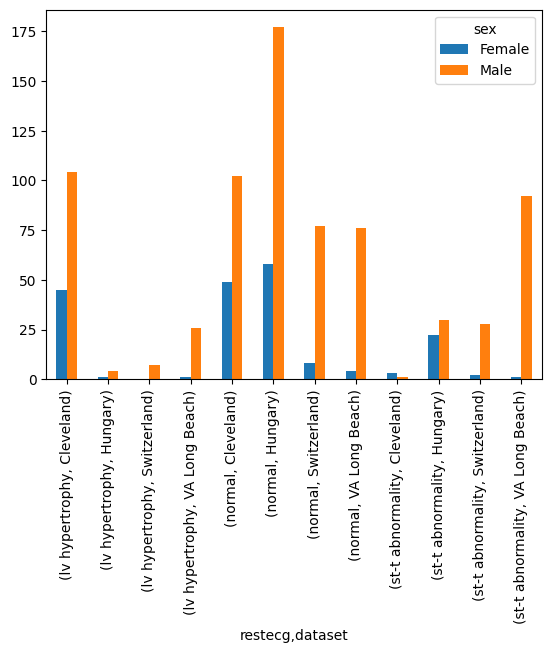

In [31]:
counts = df.groupby(df['restecg'])[['dataset','sex']].value_counts().unstack()
print(counts.plot.bar())

In [32]:
df['thalch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: thalch
Non-Null Count  Dtype  
--------------  -----  
865 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


Axes(0.125,0.11;0.775x0.77)


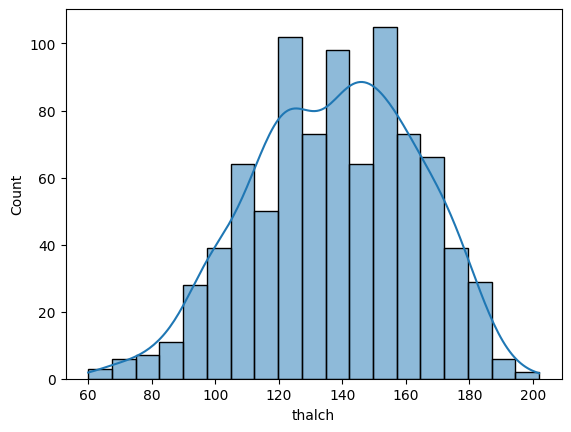

In [33]:
print(sns.histplot(df['thalch'],kde = True))

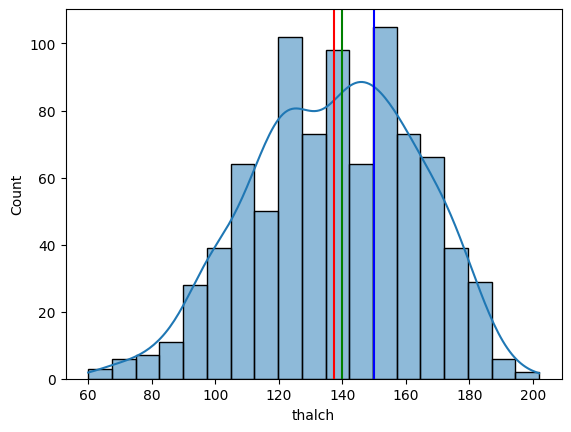

In [34]:
 # `chol` (serum cholesterol in mg/dl)
sns.histplot(df['thalch'], kde=True)
plt.axvline(df['thalch'].mean(), color='red')
plt.axvline(df['thalch'].median(), color='green')
plt.axvline(df['thalch'].mode()[0], color='blue')

In [35]:
df['exang'].value_counts()

False    528
True     337
Name: exang, dtype: int64

In [36]:
df.groupby(df['exang'])[['sex']].value_counts()

exang  sex   
False  Male      379
       Female    149
True   Male      294
       Female     43
dtype: int64

In [37]:
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [38]:
df['slope'].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [39]:
df.groupby(df['slope'])['restecg'].value_counts()

slope        restecg         
downsloping  normal               31
             lv hypertrophy       17
             st-t abnormality     15
flat         normal              206
             lv hypertrophy       84
             st-t abnormality     55
upsloping    normal              116
             lv hypertrophy       64
             st-t abnormality     22
Name: restecg, dtype: int64

In [40]:
df['ca'].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [41]:
print(df['num'].unique())

[0 2 1 3 4]


In [42]:
df['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [43]:
df.groupby(df['num'])[['dataset']].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
dtype: int64

In [44]:
#Understading the correlation

<Axes: >

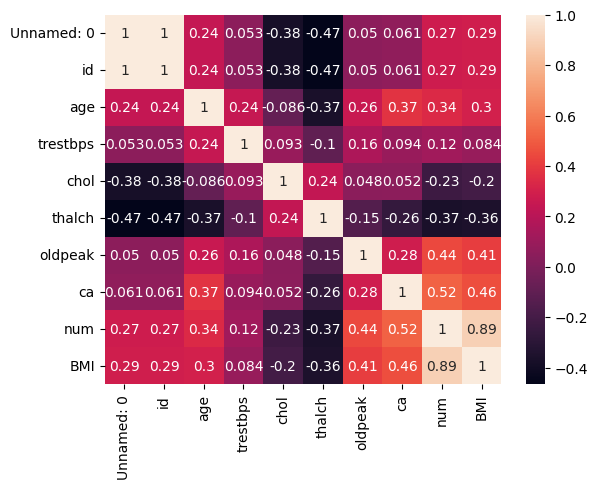

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
from ydata_profiling import ProfileReport

In [47]:
prof = ProfileReport(df)

In [48]:
prof.to_file(output_file='mainfinal1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
df['restecg'] = df['restecg'].apply(lambda x:0 if x=='normal' else( 1 if x=='lv hypertrophy' else 2) )

In [50]:
df['slope']= df['slope'].apply(lambda x:0 if x=='flat' else( 1 if x=='upsloping' else 2) )

In [51]:
df.drop(['id','dataset'],axis=1,inplace=True)

In [52]:
#handling The Outliers
df

Unnamed: 0  age     sex               cp  trestbps   chol    fbs  \
0             0   63    Male   typical angina     145.0  233.0   True   
1             1   67    Male     asymptomatic     160.0  286.0  False   
2             2   67    Male     asymptomatic     120.0  229.0  False   
3             3   37    Male      non-anginal     130.0  250.0  False   
4             4   41  Female  atypical angina     130.0  204.0  False   
5             5   56    Male  atypical angina     120.0  236.0  False   
6             6   62  Female     asymptomatic     140.0  268.0  False   
7             7   57  Female     asymptomatic     120.0  354.0  False   
8             8   63    Male     asymptomatic     130.0  254.0  False   
9             9   53    Male     asymptomatic     140.0  203.0   True   
10           10   57    Male     asymptomatic     140.0  192.0  False   
11           11   56  Female  atypical angina     140.0  294.0  False   
12           12   56    Male      non-anginal     130.0  256.0   True   
13           13   44    Male  atypical angina     120.0  263.0  False   
14           14   52    Male      non-anginal     172.0  199.0   True   
15           15   57    Male      non-anginal     150.0  168.0  False   
16           16   48    Male  atypical angina     110.0  229.0  False   
17           17   54    Male     asymptomatic     140.0  239.0  False   
18           18   48  Female      non-anginal     130.0  275.0  False   
19           19   49    Male  atypical angina     130.0  266.0  False   
20           20   64    Male   typical angina     110.0  211.0  False   
21           21   58  Female   typical angina     150.0  283.0   True   
22           22   58    Male  atypical angina     120.0  284.0  False   
23           23   58    Male      non-anginal     132.0  224.0  False   
24           24   60    Male     asymptomatic     130.0  206.0  False   
25           25   50  Female      non-anginal     120.0  219.0  False   
26           26   58  Female      non-anginal     120.0  340.0  False   
27           27   66  Female   typical angina     150.0  226.0  False   
28           28   43    Male     asymptomatic     150.0  247.0  False   
29           29   40    Male     asymptomatic     110.0  167.0  False   
30           30   69  Female   typical angina     140.0  239.0  False   
31           31   60    Male     asymptomatic     117.0  230.0   True   
32           32   64    Male      non-anginal     140.0  335.0  False   
33           33   59    Male     asymptomatic     135.0  234.0  False   
34           34   44    Male      non-anginal     130.0  233.0  False   
35           35   42    Male     asymptomatic     140.0  226.0  False   
36           36   43    Male     asymptomatic     120.0  177.0  False   
37           37   57    Male     asymptomatic     150.0  276.0  False   
38           38   55    Male     asymptomatic     132.0  353.0  False   
39           39   61    Male      non-anginal     150.0  243.0   True   
40           40   65  Female     asymptomatic     150.0  225.0  False   
41           41   40    Male   typical angina     140.0  199.0  False   
42           42   71  Female  atypical angina     160.0  302.0  False   
43           43   59    Male      non-anginal     150.0  212.0   True   
44           44   61  Female     asymptomatic     130.0  330.0  False   
45           45   58    Male      non-anginal     112.0  230.0  False   
46           46   51    Male      non-anginal     110.0  175.0  False   
47           47   50    Male     asymptomatic     150.0  243.0  False   
48           48   65  Female      non-anginal     140.0  417.0   True   
49           49   53    Male      non-anginal     130.0  197.0   True   
50           50   41  Female  atypical angina     105.0  198.0  False   
51           51   65    Male     asymptomatic     120.0  177.0  False   
52           52   44    Male     asymptomatic     112.0  290.0  False   
53           53   44    Male  atypical angina     130.0  219.0 

<Axes: >

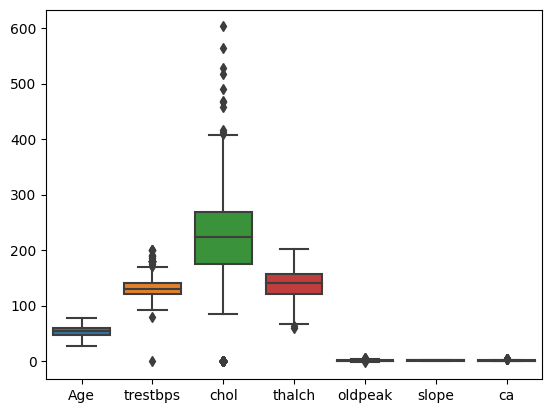

In [53]:
import seaborn as sns
import pandas as pd

# Example data
data = pd.DataFrame({
    "Age": df['age'],
    "trestbps": df['trestbps'],
    "chol": df['chol'],
    "thalch":df['thalch'],
    "oldpeak":df['oldpeak'],
    "slope":df['slope'],
    "ca":df['ca']
    
})

# Plotting boxplots
sns.boxplot(data=data)

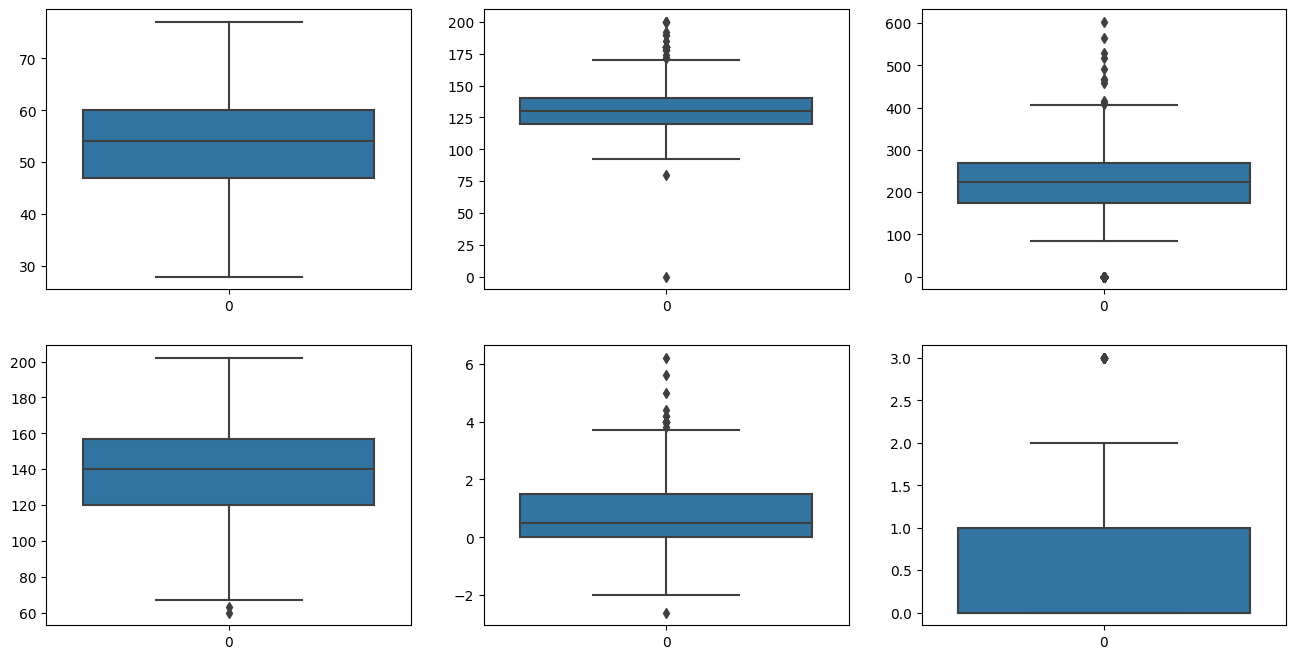

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['age'])

plt.subplot(2,3,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,3,3)
sns.boxplot(df['chol'])

plt.subplot(2,3,4)
sns.boxplot(df['thalch'])

plt.subplot(2,3,5)
sns.boxplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.boxplot(df['ca'])

# Show the plots
plt.show()

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.distplot(df['age'])

plt.subplot(2,3,2)
sns.distplot(df['trestbps'])

plt.subplot(2,3,3)
sns.distplot(df['chol'])

plt.subplot(2,3,4)
sns.distplot(df['thalch'])

plt.subplot(2,3,5)
sns.distplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.distplot(df['ca'])

# Show the plots
plt.show()

In [56]:
upperthalch = df['thalch'].mean()+3*df['thalch'].std()
upperthalch

215.3244942182772

In [57]:
lowerthalch = df['thalch'].mean() - 3 * df['thalch'].std()
lowerthalch

59.76683526149155

In [58]:
df[(df['thalch']>215.32) | (df['thalch']<5)]

Empty DataFrame
Columns: [Unnamed: 0, age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, num, BMI]
Index: []

In [59]:
df['age'].skew()

-0.195993861608106

In [60]:
df['trestbps'].skew()

0.21333446967212508

In [61]:
df['chol'].skew()

-0.6138360897370758

In [62]:
df['thalch'].skew()

-0.21111858073161133

In [63]:
df['oldpeak'].skew()

1.0414266146339854

In [64]:
df['ca'].skew()

1.1659778654172832

In [65]:
p25t = df['trestbps'].quantile(0.25)
p75t = df['trestbps'].quantile(0.75)
iqrt = p75t-p25t
uppert = p75t+iqrt
lowert = p25t-iqrt

In [66]:
uppert

160.0

In [67]:
lowert

100.0

In [68]:
df['trestbps'] = np.where(df['trestbps']>uppert,uppert,np.where(
df['trestbps']<lowert,lowert,df['trestbps']))

In [69]:
p25c = df['chol'].quantile(0.25)
p75c = df['chol'].quantile(0.75)
iqrc = p75c-p25c
upperc = p75c+iqrc
lowerc = p25c-iqrc

In [70]:
upperc

361.0

In [71]:
lowerc

82.0

In [72]:
df['chol'] = np.where(df['chol']>upperc,upperc,np.where(
df['chol']<lowerc,lowerc,df['chol']))

In [73]:
p25o = df['oldpeak'].quantile(0.25)
p75o = df['oldpeak'].quantile(0.75)
iqro = p75o-p25o
uppero = p75o+iqro
lowero = p25o-iqro

In [74]:
uppero

3.0

In [75]:
lowero

-1.5

In [76]:
df['oldpeak'] = np.where(df['oldpeak']>uppero,uppero,np.where(df['oldpeak']<lowero,lowero,df['oldpeak']))

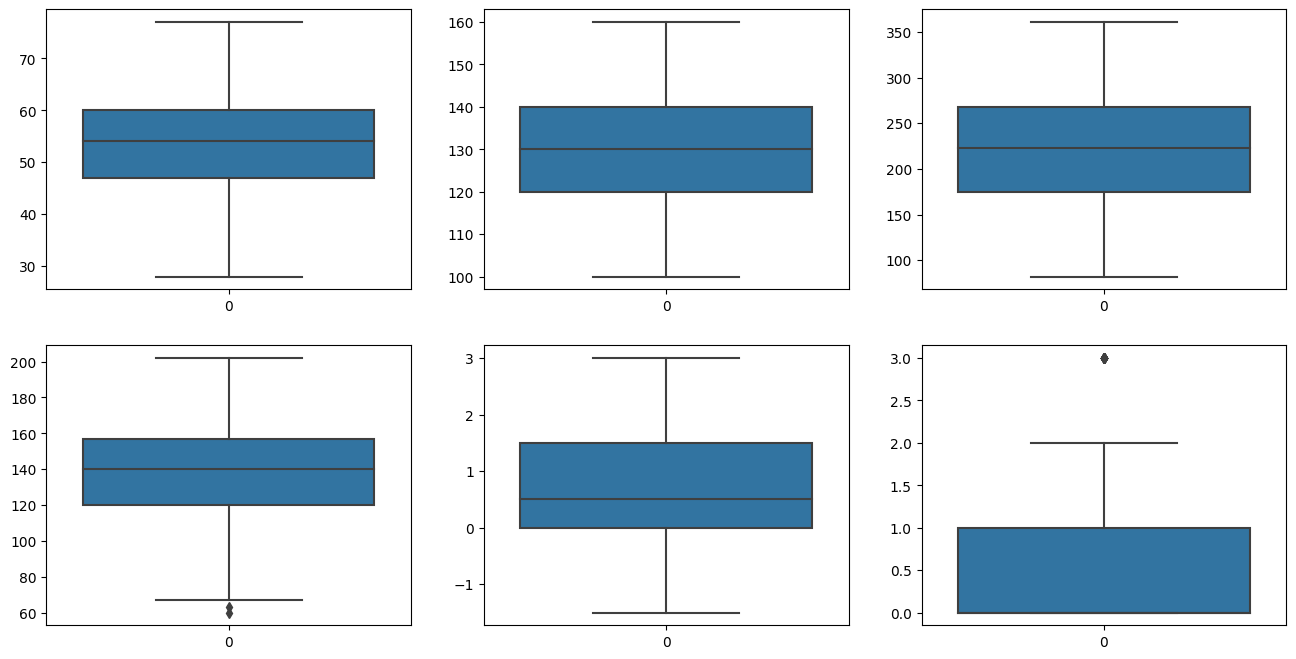

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(df['age'])

plt.subplot(2,3,2)
sns.boxplot(df['trestbps'])

plt.subplot(2,3,3)
sns.boxplot(df['chol'])

plt.subplot(2,3,4)
sns.boxplot(df['thalch'])

plt.subplot(2,3,5)
sns.boxplot(df['oldpeak'])

plt.subplot(2,3,6)
sns.boxplot(df['ca'])

# Show the plots
plt.show()

In [88]:
df.drop(columns=['Unnamed: 0'],inplace =True)

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['num'],axis=1),df['num'])

In [90]:
trf2= ColumnTransformer(transformers = [
    ('impute_bps_Chol_thal_ch_oldPeak_ca',SimpleImputer(),[3,4,7,9,11]),
    ('impute_fbs_restecg_exang_slope',SimpleImputer(strategy='most_frequent'),[5,6,8,10]),
    ('oc',OrdinalEncoder(categories=[['asymptomatic','non-anginal','atypical angina','typical angina']]),[2]),
    ('oh_sex_fbs_exang',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,5,8]),
],remainder='passthrough')

In [91]:
trf3 = StandardScaler()

In [92]:
pipe = make_pipeline(trf2,trf3)

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,100,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'knearestneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,30]
        }
    },
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
}

In [96]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    X = pipe.fit_transform(X_train)
    clf.fit(X,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

model  best_score                    best_params
0                  svm    0.878261  {'C': 10, 'kernel': 'linear'}
1        random_forest    0.891304         {'n_estimators': 1000}
2  logistic_regression    0.781159                      {'C': 10}
3    knearestneighbors    0.617391             {'n_neighbors': 5}
4          naive_bayes    0.481159                             {}

In [102]:
X = df.drop('num',axis=1)
y = df['num']
# replace 1 with 0 and all others to 1
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

In [104]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
    
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(penalty='l2'),
        'params': {
            
        }
    },
    'knearestneighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,30]
        }
    },
    'naive_bayes':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
}

In [108]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    X = pipe.fit_transform(X_train)
    clf.fit(X,Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scores

model  best_score          best_params
0                  svm    0.920290                   {}
1        random_forest    0.952174  {'n_estimators': 3}
2  logistic_regression    0.962319                   {}
3    knearestneighbors    0.866667   {'n_neighbors': 3}
4          naive_bayes    0.882609                   {}

In [109]:
import joblib

In [110]:
trf5 = LogisticRegression()

In [111]:
last_pipe = make_pipeline(trf2,trf3,trf5)

In [112]:
last_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_bps_Chol_thal_ch_oldPeak_ca',
                                                  SimpleImputer(),
                                                  [3, 4, 7, 9, 11]),
                                                 ('impute_fbs_restecg_exang_slope',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5, 6, 8, 10]),
                                                 ('oc',
                                                  OrdinalEncoder(categories=[['asymptomatic',
                                                                              'non-anginal',
                                                                              'atypical '
                                                                              'angina',
                                                                              'typical '
                                                                              'angina']]),
                                                  [2]),
                                                 ('oh_sex_fbs_exang',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 5, 8])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [114]:
last_pipe.predict([[63,'Male','typical angina',145.0,233.0,True,1,150.0,False,2.3,2,0.0,13]])

array([0])

In [115]:
joblib.dump(last_pipe,'major_finalModel1.pkl')

['major_finalModel1.pkl']